6.3 Geographic Visualization

This script contains the following:
    
1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

In [136]:
# 1. Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import matplotlib.pyplot as plt


In [137]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [138]:
path = r'/Users/bridget/Downloads/Avocado Analysis 2023'

In [139]:
#Import '.json' file for North America
Country_geo = r'/Users/bridget/Downloads/Avocado Analysis 2023/02 Data/Original Data/custom.geo.json'

In [140]:
# looking at JSON file contents:

f = open(r'/Users/bridget/Downloads/Avocado Analysis 2023/02 Data/Original Data/custom.geo.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'labelrank': 5, 'sovereignt': 'Costa Rica', 'sov_a3': 'CRI', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'tlc': '1', 'admin': 'Costa Rica', 'adm0_a3': 'CRI', 'geou_dif': 0, 'geounit': 'Costa Rica', 'gu_a3': 'CRI', 'su_dif': 0, 'subunit': 'Costa Rica', 'su_a3': 'CRI', 'brk_diff': 0, 'name': 'Costa Rica', 'name_long': 'Costa Rica', 'brk_a3': 'CRI', 'brk_name': 'Costa Rica', 'brk_group': None, 'abbrev': 'C.R.', 'postal': 'CR', 'formal_en': 'Republic of Costa Rica', 'formal_fr': None, 'name_ciawf': 'Costa Rica', 'note_adm0': None, 'note_brk': None, 'name_sort': 'Costa Rica', 'name_alt': None, 'mapcolor7': 3, 'mapcolor8': 2, 'mapcolor9': 4, 'mapcolor13': 2, 'pop_est': 5047561, 'pop_rank': 13, 'pop_year': 2019, 'gdp_md': 61801, 'gdp_year': 2019, 'economy': '5. Emerging region: G20', 'income_grp': '3. Upper middle income', 'fips_10': 'CS', 'iso_a2': 'CR', 'iso_a2_eh': 'CR', 'iso_a3': 'CRI', 'iso_a3

In [141]:
# Load data
df = pd.read_csv(os.path.join(path,'/Users/bridget/Downloads/Avocado Analysis 2023/02 Data/Original Data/Avocado.csv'), index_col = False)

In [142]:
df.head()

Date  AveragePrice  Total Volume     4046      4225    4770  \
0  2015-01-04          1.22      40873.28  2819.50  28287.42   49.90   
1  2015-01-11          1.24      41195.08  1002.85  31640.34  127.12   
2  2015-01-18          1.17      44511.28   914.14  31540.32  135.77   
3  2015-01-25          1.06      45147.50   941.38  33196.16  164.14   
4  2015-02-01          0.99      70873.60  1353.90  60017.20  179.32   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     9716.46     9186.93      529.53          0.0  conventional  2015  Albany  
1     8424.77     8036.04      388.73          0.0  conventional  2015  Albany  
2    11921.05    11651.09      269.96          0.0  conventional  2015  Albany  
3    10845.82    10103.35      742.47          0.0  conventional  2015  Albany  
4     9323.18     9170.82      152.36          0.0  conventional  2015  Albany

2.  Data Wrangling

In [143]:
#create a new column for each region

df['Average Price by Region'] = df.groupby(['region'])['AveragePrice'].transform(np.sum)

In [144]:
df

Date  AveragePrice  Total Volume     4046      4225    4770  \
0      2015-01-04          1.22      40873.28  2819.50  28287.42   49.90   
1      2015-01-11          1.24      41195.08  1002.85  31640.34  127.12   
2      2015-01-18          1.17      44511.28   914.14  31540.32  135.77   
3      2015-01-25          1.06      45147.50   941.38  33196.16  164.14   
4      2015-02-01          0.99      70873.60  1353.90  60017.20  179.32   
...           ...           ...           ...      ...       ...     ...   
27318  2015-11-22          1.97       6249.43  1733.40   2873.92   30.95   
27319  2015-11-29          2.08       4638.10  1395.02   2238.04   61.71   
27320  2015-12-13          1.80       7836.65  2194.49   2981.01   25.97   
27321  2015-12-20          1.92       6255.19  1512.45   2407.32   11.78   
27322  2015-12-27          1.81       7155.63  1478.79   2629.64   14.10   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         9716.46     9186.93      529.53          0.0  conventional  2015   
1         8424.77     8036.04      388.73          0.0  conventional  2015   
2        11921.05    11651.09      269.96          0.0  conventional  2015   
3        10845.82    10103.35      742.47          0.0  conventional  2015   
4         9323.18     9170.82      152.36          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
27318     1611.16     1590.00       21.16          0.0       organic  2015   
27319      943.33      943.33        0.00          0.0       organic  2015   
27320     2635.18     2598.45       36.73          0.0       organic  2015   
27321     2323.64     2213.72      109.92          0.0       organic  2015   
27322     3033.10     2855.55      177.55          0.0       organic  2015   

                 region  Average Price by Region  
0                Albany                   773.83  
1                Albany                   773.83  
2                Albany                   773.83  
3                Albany                   773.83  
4                Albany                   773.83  
...                 ...                      ...  
27318  WestTexNewMexico                   129.71  
27319  WestTexNewMexico                   129.71  
27320  WestTexNewMexico                   129.71  
27321  WestTexNewMexico                   129.71  
27322  WestTexNewMexico                   129.71  

[27323 rows x 14 columns]

In [145]:
#Subsetting columns for map
view_map =df[['region','Average Price by Region']]

In [146]:
view_map.head()

region  Average Price by Region
0  Albany                   773.83
1  Albany                   773.83
2  Albany                   773.83
3  Albany                   773.83
4  Albany                   773.83

In [147]:
view_map.shape

(27323, 2)

3. Data Cleaning

In [148]:
#Check subset for nulls
view_map.isnull().sum()

region                     0
Average Price by Region    0
dtype: int64

In [149]:
# The frequency of listing by region
view_map['region'].value_counts(dropna = False)

Albany                506
Plains                506
Sacramento            506
Roanoke               506
Houston               506
                     ... 
LosAngeles            104
PhoenixTucson         104
MiamiFtLauderdale     104
NorthernNewEngland    104
WestTexNewMexico      103
Name: region, Length: 78, dtype: int64

In [150]:
# drop duplicate values
view_map = view_map.drop_duplicates()

In [151]:
view_map.shape

(78, 2)

<AxesSubplot:xlabel='4046', ylabel='Count'>

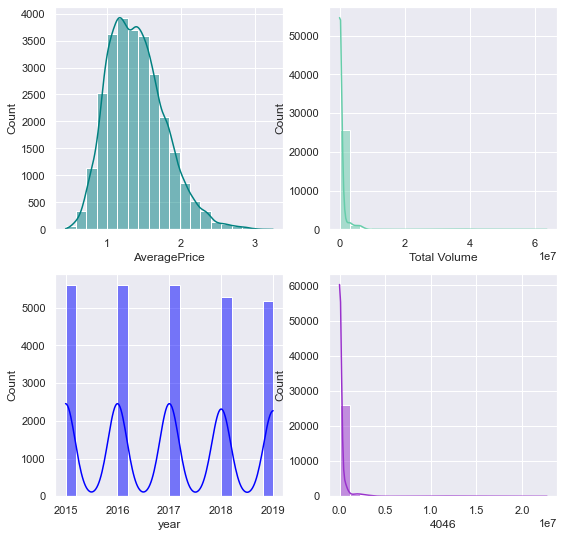

In [152]:
# Extreme values checks
# set a grey background (use sns.set_theme() 
sns.set(style='darkgrid')

fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(df['AveragePrice'], bins=20, kde = True, color='teal', ax=axs[0, 0])
sns.histplot(df['Total Volume'], bins=20, kde = True, color='mediumaquamarine', ax=axs[0, 1])
sns.histplot(df['year'], bins=20, kde = True, color='blue', ax=axs[1, 0])
sns.histplot(df['4046'], bins=20, kde = True, color='darkorchid', ax=axs[1, 1])


4. Plotting a choropleth

In [153]:
df1 = df.groupby('region')['AveragePrice'].mean()
df1.head(20)

region
Albany                  1.529308
Atlanta                 1.315237
Baltimore/Washington    1.543060
BaltimoreWashington     1.368846
Boise                   1.430059
Boston                  1.520791
Buffalo/Rochester       1.411567
BuffaloRochester        1.544615
California              1.445356
Charlotte               1.588972
Chicago                 1.548142
Cincinnati/Dayton       1.257935
CincinnatiDayton        1.202308
Columbus                1.243972
Dallas/Ft. Worth        1.102363
DallasFtWorth           1.077885
Denver                  1.283241
Detroit                 1.272352
Grand Rapids            1.486592
GrandRapids             1.416346
Name: AveragePrice, dtype: float64

In [154]:
view_map.sort_values(by = 'Average Price by Region', ascending=False)

region  Average Price by Region
10120        Sacramento                   813.26
1771          Charlotte                   804.02
7337          Northeast                   788.55
8096       Philadelphia                   787.70
2024            Chicago                   783.36
...                 ...                      ...
2478   CincinnatiDayton                   125.04
8550      PhoenixTucson                   120.34
5767         LosAngeles                   119.86
11586      SouthCentral                   115.65
2984      DallasFtWorth                   112.10

[78 rows x 2 columns]

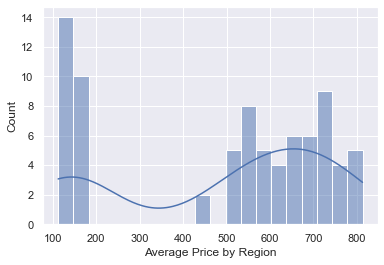

In [164]:
sns.histplot(view_map['Average Price by Region'], bins=20, kde = True) # shows extreme values for 'Avg Price by Reg'
plt.savefig('AvgPriceReghist.png')

In [160]:
# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = Country_geo, 
    data = view_map,
    columns = ['region','Average Price by Region'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [134]:
map.save('plot_data.html')

Discuss the results and what they mean in a markdown section.

Does the analysis answer any of your existing research questions?

Does the analysis lead you to any new research questions?


Map shows highest Average Price in Metropolitan Cities such as

San Fransico $3.25

Tampa $3.17

Miami/Ft LAuderdale $3.12

Lowest Average Price

Cincinnati/Dayton $0.44

Pheonix/Tuscon $0.46

Detroit $0.48

REGIONAL NATIONAL AVERAGE = $1.40

Next Steps: Take a deeper look as to what could be skewing pricing by region